In [10]:
import pingouin as pg
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
# Let's assume that we have a balanced design with 30 students in each group
n = 30
months = ['August', 'January', 'June']

# Generate random data
np.random.seed(1234)
control = np.random.normal(5.5, size=len(months) * n)
meditation = np.r_[ np.random.normal(5.4, size=n),
                    np.random.normal(5.8, size=n),
                    np.random.normal(6.4, size=n) ]

# Create a dataframe
df = pd.DataFrame({'Scores': np.r_[control, meditation],
                   'Time': np.r_[np.repeat(months, n), np.repeat(months, n)],
                   'Group': np.repeat(['Control', 'Meditation'], len(months) * n),
                   'Subject': np.r_[np.tile(np.arange(n), 3),
                                    np.tile(np.arange(n, n + n), 3)]})

In [12]:
df.head()

,Scores,Time,Group,Subject
0,5.971435,August,Control,0
1,4.309024,August,Control,1
2,6.932707,August,Control,2
3,5.187348,August,Control,3
4,4.779411,August,Control,4


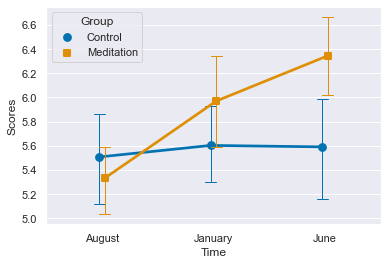

In [13]:
sns.set()
sns.pointplot(data=df, x='Time', y='Scores', hue='Group', dodge=True, markers=['o', 's'],
	      capsize=.1, errwidth=1, palette='colorblind')

In [14]:
df.groupby(['Time', 'Group'])['Scores'].agg(['mean', 'std']).round(2)

mean   std
Time    Group                 
August  Control     5.51  1.03
        Meditation  5.33  0.81
January Control     5.60  0.90
        Meditation  5.97  1.07
June    Control     5.59  1.18
        Meditation  6.35  0.93

In [15]:
# Compute the two-way mixed-design ANOVA
aov = pg.mixed_anova(dv='Scores', within='Time', between='Group', subject='Subject', data=df)
# Pretty printing of ANOVA summary
pg.print_table(aov)


ANOVA SUMMARY

Source          SS    DF1    DF2     MS      F    p-unc    np2      eps
-----------  -----  -----  -----  -----  -----  -------  -----  -------
Group        4.465      1     58  4.465  4.131    0.047  0.066  nan
Time         9.359      2    116  4.679  4.941    0.009  0.078    0.998
Interaction  6.539      2    116  3.270  3.452    0.035  0.056  nan

